Activation thresholds with arbitrary settings
=============================================

This script shows how to use the ``axon_AP_threshold()`` function to evaluate axon thresholds with various stimulation waveforms.

In [1]:
import sys 
sys.path.append("../../../")     #data path
import nrv
import matplotlib.pyplot as plt

#Update function for cathodic (monopolar) pulse
def cath_pulse_update(axon,amp, pw, start_p = 1, elec_id = 0):
    stim_1 = nrv.stimulus()
    stim_1.pulse(start=start_p, duration=pw, value = -amp)
    axon.change_stimulus_from_electrode(elec_id, stim_1)

#Update function for biphasic pulse
def biphasic_pulse_update(axon,amp, pw, start_p = 1, elec_id = 0,t_inter=50e-3):
    stim_1 = nrv.stimulus()
    stim_1.biphasic_pulse(start = start_p, s_anod=amp,t_stim=pw,s_cathod=amp,t_inter=t_inter)
    axon.change_stimulus_from_electrode(elec_id, stim_1)

#Update function for cathodic sine pulse
def cath_sine_pulse_update(axon,amp, pw, start_p = 1, elec_id = 0):
    stim_1 = nrv.stimulus()
    freq = 1/(2*pw)
    stim_1.sinus(start_p, pw, amp, freq, offset=0, phase=180, dt=0)
    axon.change_stimulus_from_electrode(elec_id, stim_1)

if __name__ == '__main__':
    # axon def
    y = 0                                               # axon y position, in [um]
    z = 0                                               # axon z position, in [um]
    d = 10                                              # axon diameter, in [um]
    L = 50_000                                  # axon length, along x axis, in [um]
    axon1 = nrv.myelinated(y,z,d,L,T=37,rec='nodes',dt=0.001)

    #electrode
    n_node = len(axon1.x_nodes)
    x_elec = axon1.x_nodes[n_node//2]
    y_elec = 1000
    z_elec = 0
    PSA = nrv.point_source_electrode(x_elec,y_elec,z_elec)
    stim1 = nrv.stimulus() #dummy stim

    ### define extra cellular stimulation
    extra_stim = nrv.stimulation('endoneurium_bhadra')
    extra_stim.add_electrode(PSA, stim1)
    axon1.attach_extracellular_stimulation(extra_stim)

    #parameters for the waveforms
    arg_stim = {'pw':50e-3, 'elec_id':0, 'start_p':1}
    max_amp = 300 #maximum search boundary

    threshold_pulse = nrv.axon_AP_threshold(axon = axon1,amp_max = max_amp,
                                            update_func = cath_pulse_update, args_update=arg_stim)
    threshold_biphasic = nrv.axon_AP_threshold(axon = axon1,amp_max = max_amp,
                                            update_func = biphasic_pulse_update, args_update=arg_stim)
    threshold_sine = nrv.axon_AP_threshold(axon = axon1,amp_max = max_amp,
                                            update_func = cath_sine_pulse_update, args_update=arg_stim)



NRV INFO: Iteration 1, Amp is 300µA ...
NRV INFO: Iteration 1, Amp is 300µA (100.0%)... AP Detected! (in 1.545s)
NRV INFO: Iteration 2, Amp is 0µA (100.0%)... AP Not Detected! (in 1.48s)
NRV INFO: Iteration 3, Amp is 150.0µA (100.0%)... AP Not Detected! (in 1.511s)
NRV INFO: Iteration 4, Amp is 225.0µA (33.33%)... AP Detected! (in 1.592s)
NRV INFO: Iteration 5, Amp is 187.5µA (16.67%)... AP Detected! (in 1.468s)
NRV INFO: Iteration 6, Amp is 168.75µA (10.0%)... AP Not Detected! (in 1.574s)
NRV INFO: Iteration 7, Amp is 178.12µA (5.26%)... AP Not Detected! (in 1.452s)
NRV INFO: Iteration 8, Amp is 182.81µA (2.56%)... AP Not Detected! (in 1.44s)
NRV INFO: Iteration 9, Amp is 185.16µA (1.27%)... AP Not Detected! (in 1.458s)
NRV INFO: Iteration 10, Amp is 186.33µA (0.63%)... AP Not Detected! (in 1.54s)
NRV INFO: Activation threshold is 186.91µA (0.63%), found in 10 iterations (15.49s).
NRV INFO: Iteration 1, Amp is 300µA ...
NRV INFO: Iteration 1, Amp is 300µA (100.0%)... AP Detected! (in 

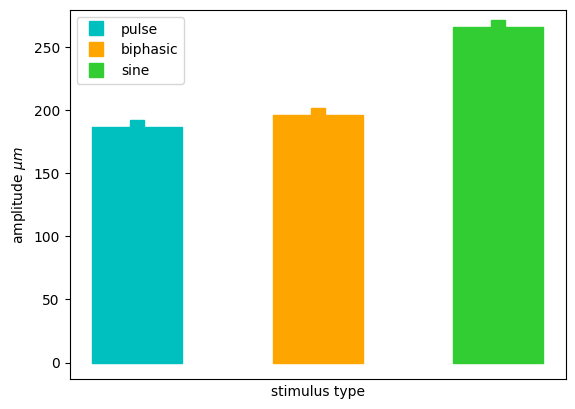

In [2]:
plt.plot([0.25], [threshold_pulse], "s", markersize=10, label="pulse", color="c")
plt.plot([1.25], [threshold_biphasic], "s", markersize=10, label="biphasic", color="orange")
plt.plot([2.25], [threshold_sine], "s", markersize=10, label="sine", color="limegreen")
plt.fill_between([0, 0.5], [threshold_pulse, threshold_pulse], 0, color="c")
plt.fill_between([1,1.5], [threshold_biphasic, threshold_biphasic], 0, color="orange")
plt.fill_between([2, 2.5], [threshold_sine, threshold_sine], 0, color="limegreen")
plt.xticks([])
plt.xlabel("stimulus type")
plt.ylabel("amplitude $\mu m$")
plt.legend()
